In [7]:
from datascience import *
import numpy as np
from math import *
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline

## Lesson 32: Likelihood Ratio Tests

Last time, we introduced Likelihood Ratio tests. Recall that the point of a likelihood ratio test is to compare the likelihood function under a hypothesized value of the parameter with the liklihood function at its maximum. Instead of looking at the ratio $\Lambda$ itself, we often consider $-2\log \Lambda$ instead, since it has a handy distribution. 

### Example 1: Exponential Distribution

Suppose $X_1,X_2,...,X_n$ is an iid sequence of random variables from the exponential distribution with unknown parameter $\lambda$. Recall that the maximum likelihood estimate of $\lambda$ is $1\over\bar{X}$. We collect a random sample of size 20 and want to test the hypothesis $H_0: \lambda = 3$ vs $H_1: \lambda \neq 3$. Using the data in the python box below, conduct a likelihood ratio test on this hypothesis.  

In [8]:
my_data=np.array([0.18,0.277,0.105,0.126,0.225,0.026,0.123,0.423,0.006,0.281,0.050,0.692,0.105,0.275,0.346,0.079,0.045,0.222,0.063,0.281])

In [9]:
n = 20
lmbda0 = 3
lmbda1 = 1/np.mean(my_data)

In [10]:
a = np.sum(my_data)
top_ratio = (lmbda0**n)*(e**(-lmbda0*a))
bottom_ratio = (lmbda1**n)*e**(-lmbda1*a)
ratio = top_ratio/bottom_ratio
ratio

0.0944569427967814

#### Power

Suppose that the true value of $\lambda$ is 5. Let's determine the power of this test. Let $n=20$. Then determine the power if $n=50$. Remember, power is the probability of correctly rejecting the null hypothesis. 

First, find what value of $-2 \log \Lambda$ would lead you to reject $H_0$. This is sometimes called the critical value. 

In [11]:
crit = stats.chi2.ppf(0.95,1)
crit

3.841458820694124

Next, obtain the power. Obtain a sample of size 20 from the true population and obtain the value of $-2\log \Lambda$ for this sample. Repeat many times and determine how often you reject the null hypothesis. 

In [12]:
ts=[]
lmbda0 = 3
n=20
for each in np.arange(0,1000):
    sim_data = stats.expon.rvs(scale=1/5,size=n)
    test_stat=-2*log((np.mean(sim_data)**n)*(lmbda0**n)*e**(-lmbda0*sum(sim_data)+n))
    ts=np.append(ts,test_stat)
np.mean(ts>=crit)

0.555

Repeat for a sample size of 50. What do you expect to happen to power? 

In [13]:
ts=[]
lmbda0 = 3
n=50
for each in np.arange(0,1000):
    sim_data = stats.expon.rvs(scale=1/5,size=n)
    test_stat=-2*log((np.mean(sim_data)**n)*(lmbda0**n)*e**(-lmbda0*sum(sim_data)+n))
    ts=np.append(ts,test_stat)
np.mean(ts>=crit)

0.948

### A Different Test

We've explored hypothesis tests in this class before. Taking advantage of our computing power, we don't have to rely on test statistics with asymptotic distributions. Let's conduct a more direct hypothesis test using simulation. Recall:

$$
H_0: \lambda = 3
$$

$$
H_1: \lambda \neq 3
$$

Pick a different test statistic. Obtain an empirical distribution of that test statistic under $H_0$. Next, find the $p$-value by determining how often this test statistic is at or further away from the test statistic derived from the sample. Remember that this is a two-sided test. 

0.4934
0.5066


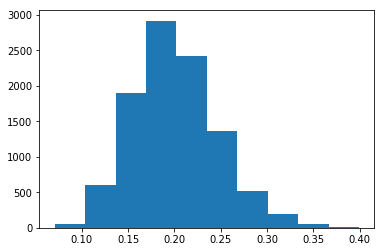

In [21]:
ts = []
for each in np.arange(0,10000):
    stat = np.mean(stats.expon.rvs(scale=1/5,size=20))
    ts=np.append(ts,stat)
    
plt.hist(ts)
print(np.mean(np.mean(my_data)>=ts))
print(np.mean(np.mean(my_data)<=ts))

How did the $p$-value compare to the LRT $p$-value? I wonder how the power of this test compares to our LRT. 

#### Power

Let's figure out the power of this test. First, determine for what values of the test statistic would lead us to reject $H_0$. These values can be referred to as your rejection region. 

In [22]:
crit2 = percentile(95, ts)
crit2

0.28050214372043186

Now, determine the power of this test. Like in the LRT case, obtain a sample of size 20 and obtain the test statistic. Repeat many times and see how often your test statistic is in your rejection region. 

In [25]:
n=20
lmbda=3
values = []
for each in np.arange(10000):
    value=np.mean(stats.expon.rvs(scale=1/5,size=n))
    values=np.append(value,values)
    
np.mean(values>=crit2)

0.0454

Repeat for a sample size of 50. Note that you will have to obtain new critical values in order to do this.  

In [26]:
ts2 = []
for each in np.arange(0,10000):
    stat2 = np.mean(stats.expon.rvs(scale=1/5,size=50))
    ts2=np.append(ts2,stat)
    
crit3 = percentile(95, ts2)
crit3

0.25963934824520407

In [105]:
n=50
lmbda=3
values2 = []
for each in np.arange(10000):
    value=np.mean(stats.expon.rvs(scale=1/lmbda,size=n))
    values2=np.append(value,values)
    
np.mean(values2>=crit3)

0.0827917208279172